
 A Data Anayltics look at Rainbow Six Siege

Introduction


Rainbow Six Siege is a multi-platform strategy shooter that was released 4 years ago and has grown to be one of the most popular and played games out. I’ve decided to do my project on this game because I am a big fan of the game and I wanted to look in to the stats of the game a bit deeper. Rainbow Six Siege is a game that has seasons which last 3 months. Then at the end of the season Ubisoft (the Company that make RBS6) release stats on their webpage. These are the win rate delta per operator vs pick rate. The data they use is only from the Ranked PC Platinum & Diamond playlist. They show us two of these, one for attackers and one for defenders. Using these stats, a youtuber called get_flanked analyses them and finds trends from season to season such as, what operators are too strong/weak and what operators need fixing. I find this fascinating.
My starting point was going on to Kaggle and finding the database that I will use; the database came from Ubisoft who were kind enough to share it last year. Because of the size of the database(19gb) I will only take a small sample of it.  
  



1.2.Background

https://www.youtube.com/watch?v=8CwM0AabEiY 

The above video shows an example of what kind of research questions can be asked from the data.

https://rainbow6.ubisoft.com/siege/en-us/news/152-357729-16/y4s33-designers-notes-mid-season

the current mid-season data anaylis from ubisoft


1.3 Research Question

What is the advantage of playing with a teammate? Will there win ratio be better or worse with a teammate?




Initial Data Report


data colllection
https://rainbow6.ubisoft.com/siege/en-us/news/152-293696-16/introduction-to-the-data-peek-velvet-shell-statistics

I got my data collection from the above web page. because of the size of the collection I decided to use only a sample of the data. When I tried to upload the csv file to Jupyter notebook, it was too big. So, I went to a csv splitter website page and broke up the sample of the collection, into even smaller csv files. thankfully that worked, and I was able to get my data into juypter.

In [1]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import os
from pandas import read_csv

In [2]:
df = pd.concat(map(pd.read_csv, ['datadump_s5-000-10.csv', 'datadump_s5-000-11.csv','datadump_s5-000-12.csv'])) #loading and concataniting the csv files
df = df.drop(['dateid','roundnumber', 'primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel',
       'secondaryweapon', 'secondaryweapontype', 'secondarysight',
       'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel',
       'secondarygadget'] ,axis=1)
df.head()

,platform,gamemode,mapname,matchid,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,skillrank,role,team,haswon,operator,nbkills,isdead,primaryweapon,primaryweapontype
0,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,DefendersEliminated,167,228,Platinum,Attacker,1,1,SAT-HIBANA,1,1,TYPE-89,Assault_Rifles
1,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,DefendersEliminated,167,35,Gold,Attacker,1,1,GIGN-TWITCH,1,1,F2,Assault_Rifles
2,PS4,SECURE_AREA,KANAL,2517955429,SERVER_ROOM,Defender,ObjectiveProtected,232,49,Gold,Defender,0,1,GSG9-BANDIT,0,1,MP7,Submachine_Guns
3,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,ObjectiveCaptured,211,111,Gold,Defender,0,0,SWAT-CASTLE,0,1,UMP45,Submachine_Guns
4,PS4,SECURE_AREA,KANAL,2517955429,SERVER_ROOM,Defender,AttackersEliminated,223,281,Platinum,Defender,1,1,SAS-MUTE,0,1,MP5K,Submachine_Guns


In [3]:
df.columns

Index(['platform', 'gamemode', 'mapname', 'matchid', 'objectivelocation',
       'winrole', 'endroundreason', 'roundduration', 'clearancelevel',
       'skillrank', 'role', 'team', 'haswon', 'operator', 'nbkills', 'isdead',
       'primaryweapon', 'primaryweapontype'],
      dtype='object')

In [4]:
df.shape

(101202, 18)

In [5]:
df.dtypes

platform             object
gamemode             object
mapname              object
matchid               int64
objectivelocation    object
winrole              object
endroundreason       object
roundduration         int64
clearancelevel        int64
skillrank            object
role                 object
team                  int64
haswon                int64
operator             object
nbkills               int64
isdead                int64
primaryweapon        object
primaryweapontype    object
dtype: object

In [6]:
df.describe()

,matchid,roundduration,clearancelevel,team,haswon,nbkills,isdead
count,1.012020e+05,101202.000000,101202.000000,101202.000000,101202.000000,101202.000000,101202.000000
mean,2.365216e+09,186.143722,92.203474,0.500692,0.510079,0.697852,0.700362
std,8.972321e+07,86.028054,45.740699,0.500002,0.499901,0.923154,0.458102
min,2.210040e+09,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.283538e+09,155.000000,58.000000,0.000000,0.000000,0.000000,0.000000
50%,2.367911e+09,189.000000,89.000000,1.000000,1.000000,0.000000,1.000000
75%,2.442089e+09,223.000000,123.000000,1.000000,1.000000,1.000000,1.000000
max,2.517955e+09,23188.000000,306.000000,1.000000,1.000000,6.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101202 entries, 0 to 33737
Data columns (total 18 columns):
platform             101202 non-null object
gamemode             101202 non-null object
mapname              101202 non-null object
matchid              101202 non-null int64
objectivelocation    101202 non-null object
winrole              101202 non-null object
endroundreason       101202 non-null object
roundduration        101202 non-null int64
clearancelevel       101202 non-null int64
skillrank            101202 non-null object
role                 101202 non-null object
team                 101202 non-null int64
haswon               101202 non-null int64
operator             101202 non-null object
nbkills              101202 non-null int64
isdead               101202 non-null int64
primaryweapon        101202 non-null object
primaryweapontype    101202 non-null object
dtypes: int64(7), object(11)
memory usage: 14.7+ MB


In [8]:
df.head(10)

,platform,gamemode,mapname,matchid,objectivelocation,winrole,endroundreason,roundduration,clearancelevel,skillrank,role,team,haswon,operator,nbkills,isdead,primaryweapon,primaryweapontype
0,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,DefendersEliminated,167,228,Platinum,Attacker,1,1,SAT-HIBANA,1,1,TYPE-89,Assault_Rifles
1,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,DefendersEliminated,167,35,Gold,Attacker,1,1,GIGN-TWITCH,1,1,F2,Assault_Rifles
2,PS4,SECURE_AREA,KANAL,2517955429,SERVER_ROOM,Defender,ObjectiveProtected,232,49,Gold,Defender,0,1,GSG9-BANDIT,0,1,MP7,Submachine_Guns
3,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,ObjectiveCaptured,211,111,Gold,Defender,0,0,SWAT-CASTLE,0,1,UMP45,Submachine_Guns
4,PS4,SECURE_AREA,KANAL,2517955429,SERVER_ROOM,Defender,AttackersEliminated,223,281,Platinum,Defender,1,1,SAS-MUTE,0,1,MP5K,Submachine_Guns
5,PS4,SECURE_AREA,KANAL,2517955429,SERVER_ROOM,Defender,ObjectiveProtected,232,136,Platinum,Defender,0,1,BOPE-CAVEIRA,0,1,M12,Submachine_Guns
6,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,ObjectiveCaptured,211,151,Platinum,Defender,0,0,GSG9-JAGER,1,0,416-C_CARBINE,Assault_Rifles
7,PS4,SECURE_AREA,KANAL,2517955429,BOAT_SUPPLIES,Attacker,ObjectiveCaptured,211,239,Platinum,Attacker,1,1,SWAT-THERMITE,0,0,556XI,Assault_Rifles
8,PS4,SECURE_AREA,KANAL,2517955429,SERVER_ROOM,Defender,AttackersEliminated,223,35,Gold,Defender,1,1,SPETSNAZ-KAPKAN,0,1,9x19VSN,Submachine_Guns
9,PS4,SECURE_AREA,KANAL,2517955429,MAPS_OFFICE,Defender,AttackersEliminated,204,111,Gold,Attacker,0,0,SAT-HIBANA,0,1,TYPE-89,Assault_Rifles


2.3.1. Missing Data

In [9]:
df.isnull().sum()

platform             0
gamemode             0
mapname              0
matchid              0
objectivelocation    0
winrole              0
endroundreason       0
roundduration        0
clearancelevel       0
skillrank            0
role                 0
team                 0
haswon               0
operator             0
nbkills              0
isdead               0
primaryweapon        0
primaryweapontype    0
dtype: int64

In [10]:
# get missing data information on dataset
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [11]:
missing_values_table(df)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [12]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.
We will remove 0 columns.


In [13]:
# dropping duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.describe()

,matchid,roundduration,clearancelevel,team,haswon,nbkills,isdead
count,1.011720e+05,101172.000000,101172.000000,101172.000000,101172.000000,101172.000000,101172.000000
mean,2.365211e+09,186.138902,92.204009,0.500662,0.510111,0.697950,0.700332
std,8.971888e+07,86.037923,45.739091,0.500002,0.499900,0.923204,0.458115
min,2.210040e+09,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.283538e+09,155.000000,58.000000,0.000000,0.000000,0.000000,0.000000
50%,2.367911e+09,189.000000,89.000000,1.000000,1.000000,0.000000,1.000000
75%,2.442089e+09,223.000000,123.000000,1.000000,1.000000,1.000000,1.000000
max,2.517955e+09,23188.000000,306.000000,1.000000,1.000000,6.000000,1.000000


2.4.1 Distributions 

In [15]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [16]:
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries'); 
        plt.title('Distribution of '+col);

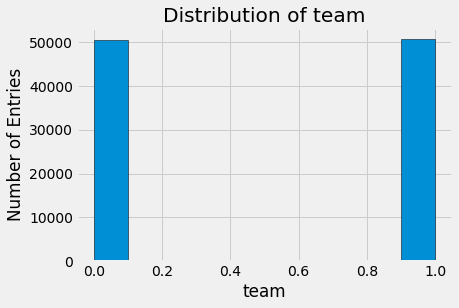

In [17]:
col = 'team'
# Histogram & Results
hist_chart(df, col)
#count_values_table(team)

fig.1 shows distribution of the column team

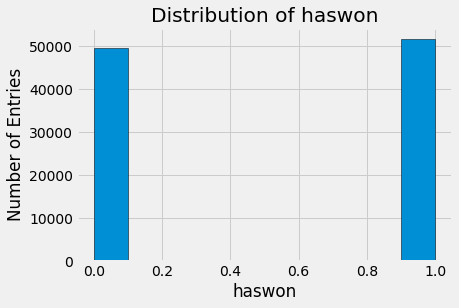

In [18]:
col = 'haswon'
# Histogram & Results
hist_chart(df, col)
#count_values_table(team)

fig.2 shows distribution of the column haswon

In [19]:
df['haswon'].equals(df['team'])

False

In [20]:

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


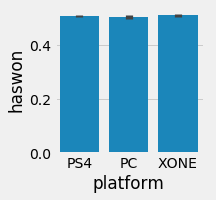

In [21]:
plot_categories( df , cat = 'platform' , target = 'haswon') 

fig.3 shows which platform has the bigger win lose ratio

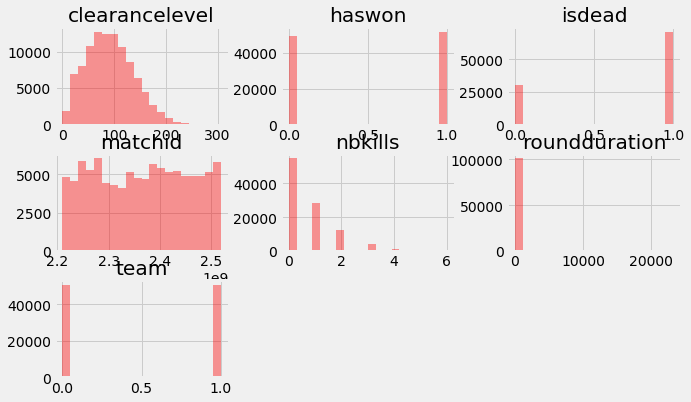

In [22]:
pdhist2 = df.hist(bins=20, color='r',alpha=0.4, figsize=(10,6))

fig.4 shows distribution of the column team

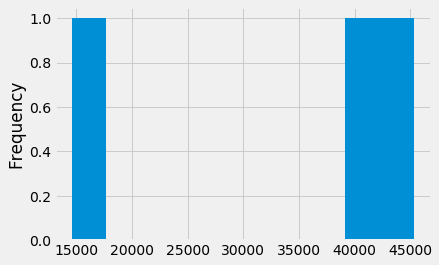

In [23]:
df['platform'].value_counts().plot.hist()

fig.5 shows distribution of the column team

In [24]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
   

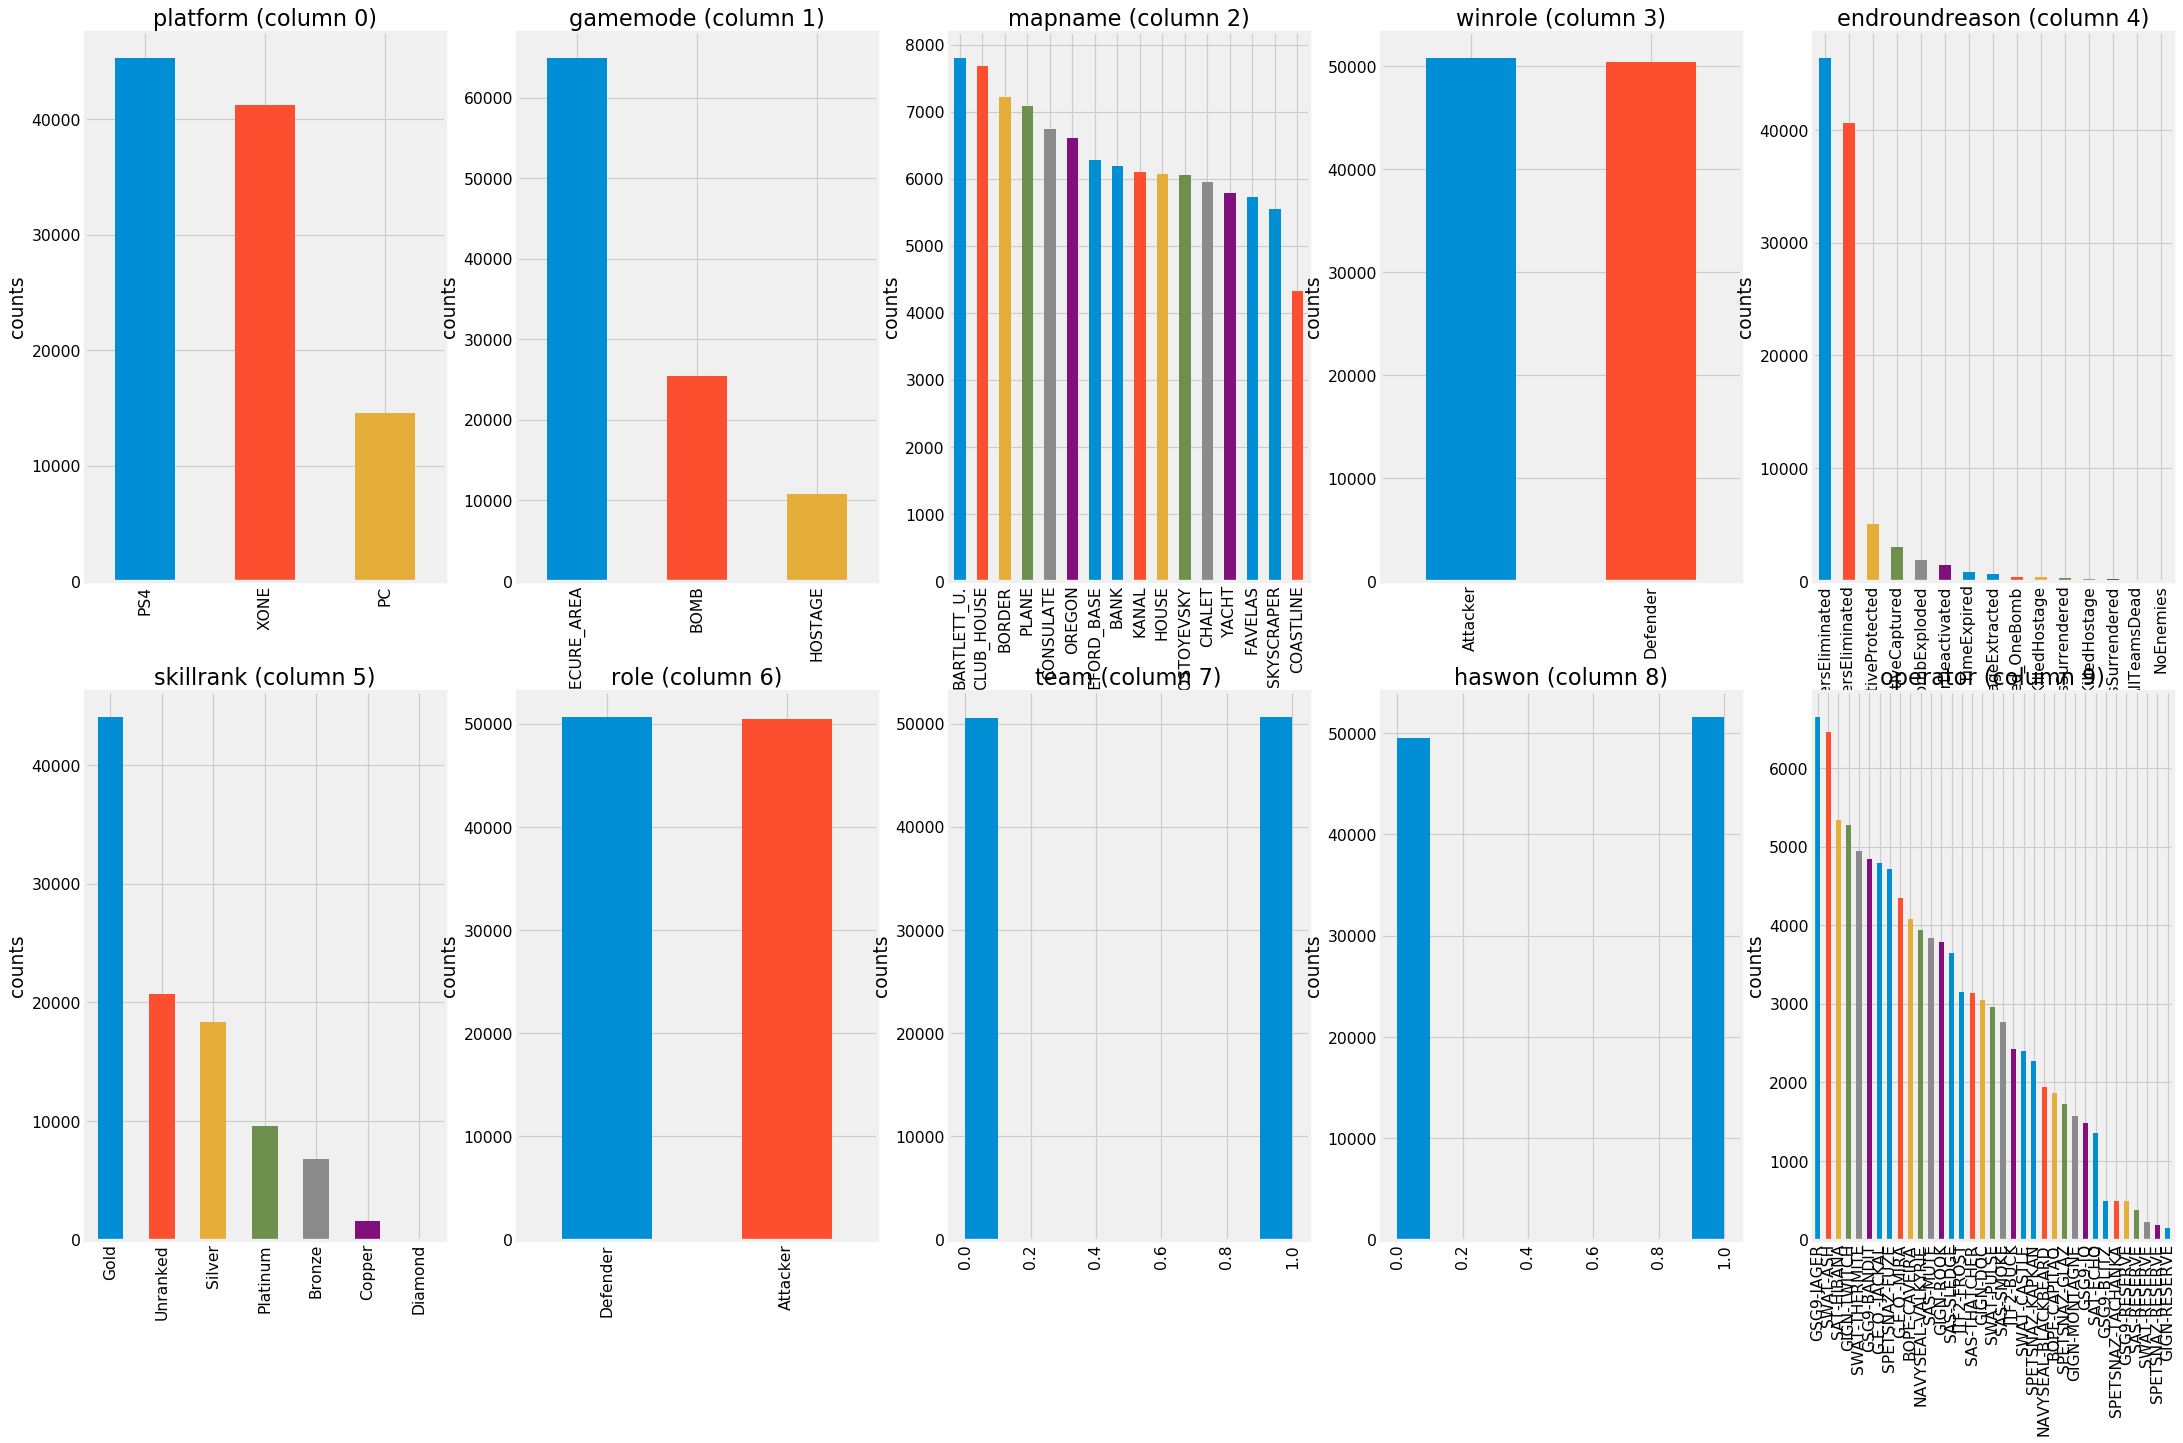

In [25]:
plotPerColumnDistribution(df, 10, 5)

fig.6 shows count of data in each column of dataset

In [26]:
df1 = pd.concat(map(pd.read_csv, ['datadump_s5-000-10.csv', 'datadump_s5-000-11.csv','datadump_s5-000-12.csv'])) #loading and concataniting the csv files
df1 = df1.drop(['dateid','gamemode','mapname','matchid','objectivelocation','winrole','endroundreason','roundnumber', 'primaryweapon', 'primaryweapontype','primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel',
       'secondaryweapon', 'secondaryweapontype', 'secondarysight',
       'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel',
       'secondarygadget'] ,axis=1)
df1.head()

,platform,roundduration,clearancelevel,skillrank,role,team,haswon,operator,nbkills,isdead
0,PS4,167,228,Platinum,Attacker,1,1,SAT-HIBANA,1,1
1,PS4,167,35,Gold,Attacker,1,1,GIGN-TWITCH,1,1
2,PS4,232,49,Gold,Defender,0,1,GSG9-BANDIT,0,1
3,PS4,211,111,Gold,Defender,0,0,SWAT-CASTLE,0,1
4,PS4,223,281,Platinum,Defender,1,1,SAS-MUTE,0,1


2.4.2 Correlations

In [27]:
def plotCorrelationMatrix(df1, graphWidth):
    filename = df1
    df1 = df1.dropna('columns') 
    df1 = df1[[col for col in df1 if df1[col].nunique() > 1]] 
    if df1.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df1.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

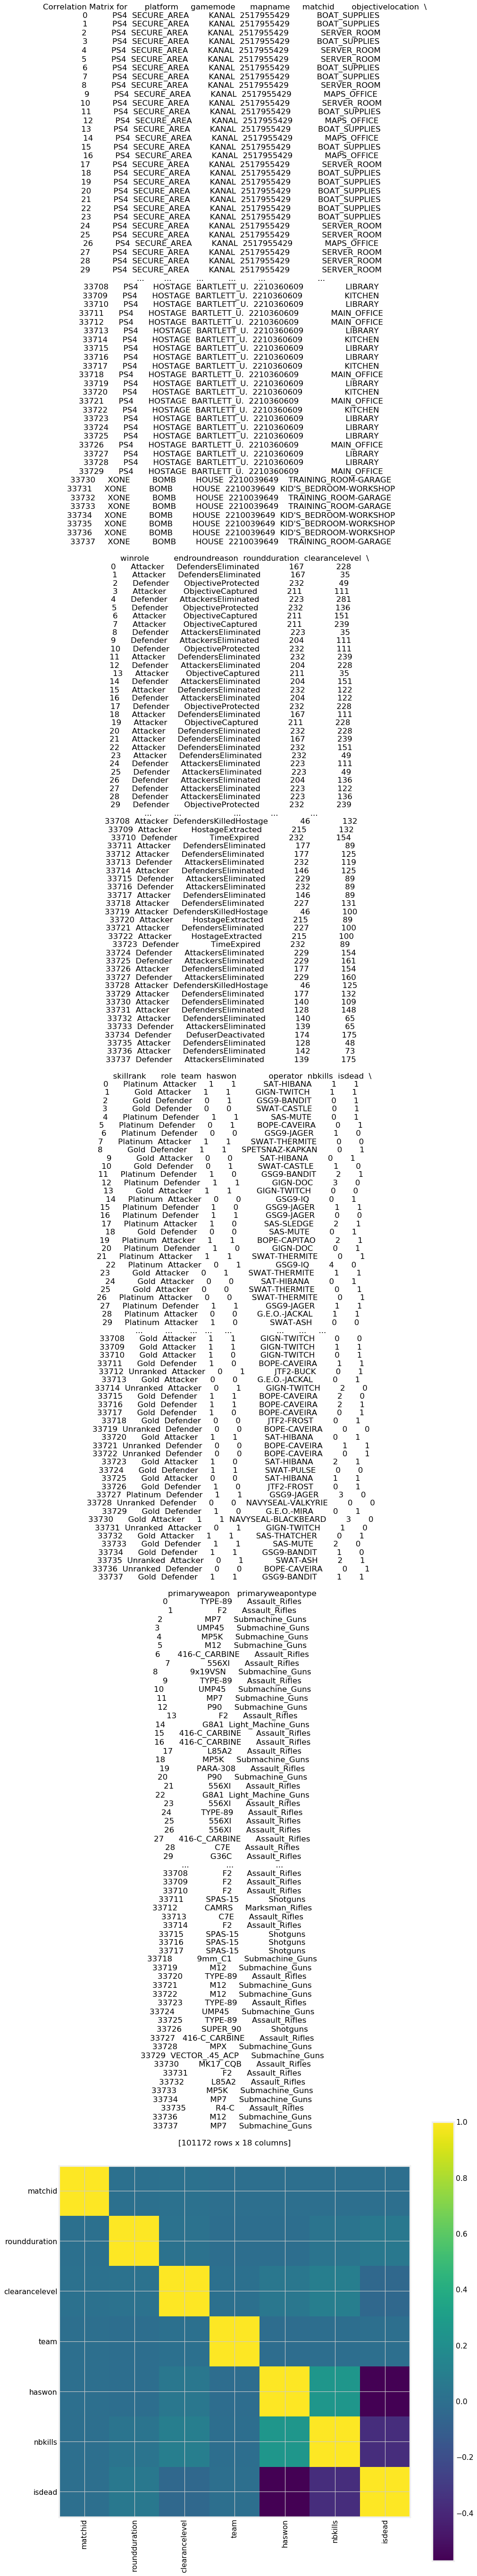

In [28]:
plotCorrelationMatrix(df, 15)

fig.7 shows correlation of columns

In [29]:
del_col_list = ['dateid','platform','gamemode','mapname','matchid','objectivelocation','winrole','roundduration','clearancelevel', 'skillrank', 'role','operator','nbkills','isdead','endroundreason','roundnumber', 'primaryweapon', 'primaryweapontype','primarysight', 'primarygrip', 'primaryunderbarrel', 'primarybarrel',
       'secondaryweapon', 'secondaryweapontype', 'secondarysight',
       'secondarygrip', 'secondaryunderbarrel', 'secondarybarrel',
       'secondarygadget']
df4 = pd.concat(map(pd.read_csv, ['datadump_s5-000-10.csv', 'datadump_s5-000-11.csv','datadump_s5-000-12.csv']))
df4 = df4.drop(del_col_list, axis=1)
df4.head()

,team,haswon
0,1,1
1,1,1
2,0,1
3,0,0
4,1,1


In [30]:
df5= df4.groupby(["team", "haswon"]).size()
df5.head()

team  haswon
0     0         24533
      1         25998
1     0         25048
      1         25623
dtype: int64

6 Findings

In [ ]:
df5 = pd.DataFrame([[1,2,3,4]], columns = ['NoTeamMateNoWin','NoTeamMateWin','TeamMateNoWin','TeamMateWin'])
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df.plot(kind='pie', y = 'team', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df['haswon'], legend = False, fontsize=14)

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
plt.show()

KeyboardInterrupt: 

fig.8 shows pie chart of winning with teammate or not

Discussion

My main aim of my project was to analyse the data for answering my research questions. What is the advantage of playing with a teammate? Will there win ratio be better or worse with a teammate? After going through my research there wasn’t any dataset that I could compare my own research too.  Having gone through the data I was surprised by my results. Going into it I expected, that when playing with a teammate/’s you would have a massive advantage and that the win rate would be significantly higher than when playing without a teammate/’s. Looking at the conclusion this was far from the truth. It shows there is very little difference between whether you play with a teammate or not.

Conclusion

In Conclusion I would have to say that my overall reaction was surprise. I generally thought that there would be a significantly higher win rate for when playing with a teammate.
